In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os
src_path='../src'
if not src_path in sys.path:
    sys.path.insert(1,src_path)
from preposessing import *
from utils_OB import *
from _tracking import *
%load_ext autoreload
import pickle
%autoreload 2
from utils_JK import *
from _postprocessing import *
import seaborn as sns
sns.set_theme(context='paper', style = 'ticks', color_codes='deep')
matplotlib.use('module://matplotlib_inline.backend_inline')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
qualitative_colors = sns.color_palette("Set3",30)
print(len(qualitative_colors))

30


In [3]:
folder_path='../../first_seg/'
omegas,phis,names=import_folder_for_tracking(folder_path)
freqs=radtoHz(omegas)
print((freqs[0]))


[0.05172644 0.10410832 0.11615228 0.14330499 0.18327255 0.20668422
 0.21430456 0.27620497 0.31406919 0.3334329  0.36958365 0.40131719
 0.41687186 0.46441355 0.47356046 0.51455865 0.52596812 0.54696358
 0.54809304 0.62419292 0.71152559 0.73057207 0.80432951 0.81431852
 0.90196625 0.99944469]


In [15]:
# for phi in phis[14:18]
for i in range(15,19):
    print(round(freqs[0][i],4))
    print(MAC(phis[0][i],phis[0][15]))

0.5146
1.0
0.526
0.000645711737951095
0.547
0.002939431484332508
0.5481
0.00016213917224426188


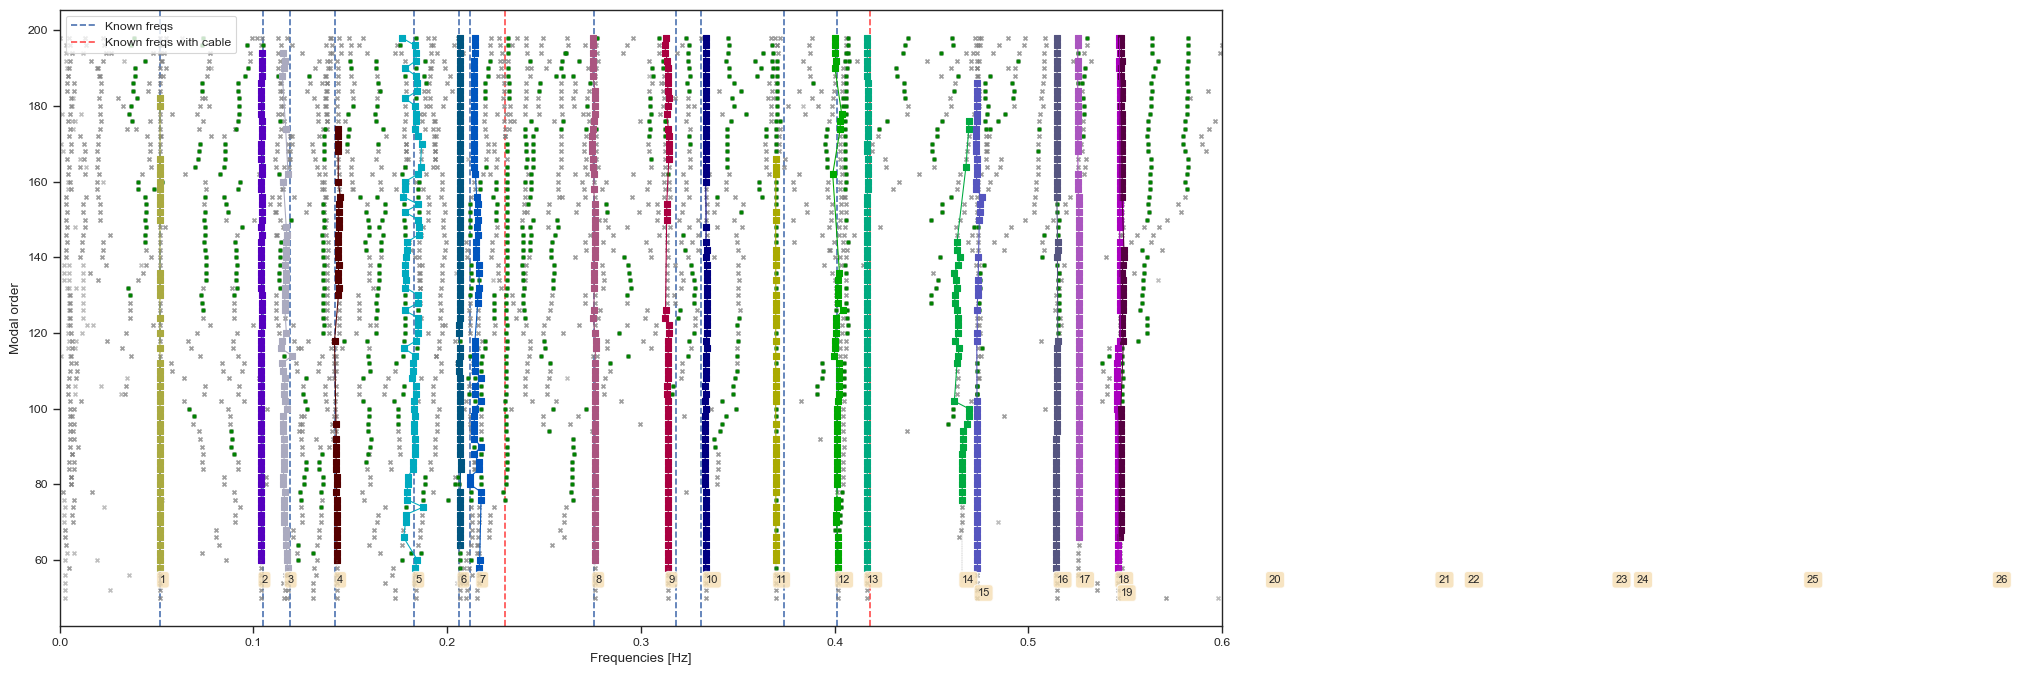

In [18]:
ts=import_converted_ts('../../first_seg/','HB141M-2013-12-05_00-56-08.pkl')
fig=PlotStabDiagFromTsObject(ts,xmax=0.6)

In [22]:
comp_traces=[]

In [24]:
trace_comparisons_alg1=PostTraceComparison()
trace_comparisons_alg1.import_Post_traces_from_folder('../../Tracking/Method1_a_n10/')
comp_traces.append(trace_comparisons_alg1)

In [ ]:
### FARGETESTING
count=0
colors={}
for ptrace in trace_comparisons_alg1.Post_traces:
    print(np.mean(ptrace.frequencies))
    count+=1
print('Count ',count)


0.051440629250355946
0.10482722230378724
0.11807047942963439
0.14252718085503183
0.18360394583291736
0.20607280204180065
0.2131370191264357
0.27659150315676984
0.3183742890207623
0.33352644142966603
0.3698342678207916
0.4005930355156324
0.40598810432885546
0.4167164128499862
0.4646207325855476
0.47057342801252056
0.5142581248305934
0.5273517159685219
0.546193977572144
0.5508938441295251
0.5838064610192906
0.5977192674857554
0.6256467024923776
0.7121826238745573
0.8029923734122486
0.8169919318758947
0.8999146751028894
0.9960805506555608
Count  28


range(0, 3803, 253)


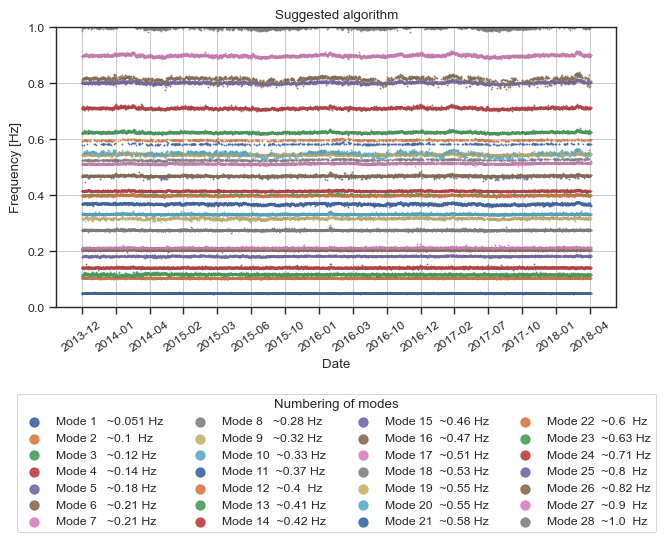

In [29]:
fig_alg1=trace_comparisons_alg1.plot_all_traces(interactive=False,n=15,fname='Method1_traces_bridge_4_ec',title='Suggested algorithm',legend=True)
plt.show()

### Testing intial plot

In [33]:
with open('suggested_initials_50.pkl', "rb") as file:
    sug_segs_50= pickle.load(file)

with open('suggested_split_initials_50.pkl', "rb") as file:
    sug_split_segs_50= pickle.load(file)

In [34]:
# print((sug_split_segs_50[0]))
initial_freqs=[]
for trace in sug_split_segs_50[0]:
    initial_freqs.append([trace.ref_frequency])

In [35]:
fig_alg1=trace_comparisons_alg1.plot_all_traces_2(interactive=False,n=15,fname='Method1_traces_bridge_4_ec_initial_rerun',title='Suggested algorithm',legend=True,
                                                  initial='suggested',init_freqs=initial_freqs)
plt.show()

ValueError: range() arg 3 must not be zero

<Figure size 800x450 with 0 Axes>

In [51]:
# print((trace_comparisons_alg1.file_names))
test_arr=np.array([np.array([1,1,1,1]),np.array([2,2,2,2]),np.array([3,3,3])],dtype=object)
print(np.mean(test_arr,axis=1))

AxisError: axis 1 is out of bounds for array of dimension 1

In [12]:
# trace_comparisons.comparison_plots()

In [13]:
# trace_comparisons.Post_traces[0].plot_comparisons()

# HE2022

In [37]:
trace_comparisons_HE=PostTraceComparison()
trace_comparisons_HE.import_Post_traces_from_folder('../../Tracking/HE_2022_2/')
comp_traces.append(trace_comparisons_HE)

range(0, 3853, 256)


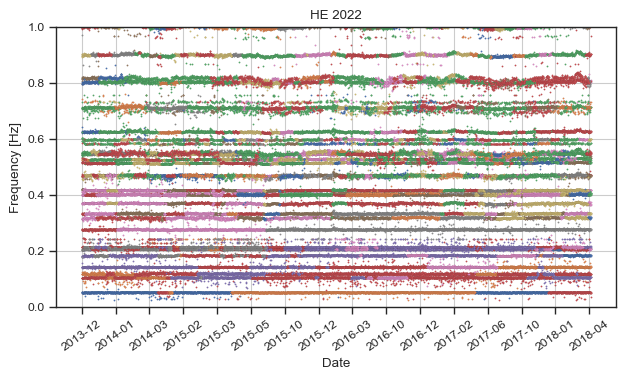

In [24]:
HE_fig=trace_comparisons_HE.plot_all_traces(interactive=False,n=15,fname='HE_2022.png',title='HE 2022')
plt.show()

In [38]:
freqs3=[]
for f in freqs[0]:
    freqs3.append([f])

range(0, 3853, 256)


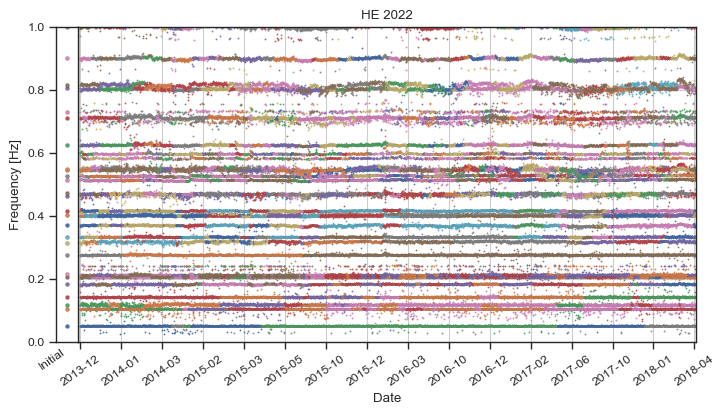

In [39]:
HE_fig=trace_comparisons_HE.plot_all_traces_2(interactive=False,n=15,fname='HE_2022_2_ec_rerun.png',title='HE 2022',initial='suggested',init_freqs=freqs3)
plt.show()

In [25]:
print(trace_comparisons_HE.file_names)

['HB141M-2013-12-05_00-56-08' 'HB141M-2013-12-05_01-27-08'
 'HB141M-2013-12-06_08-24-54' ... 'HB141M-2018-04-03_18-41-57'
 'HB141M-2018-04-03_21-04-10' 'HB141M-2018-04-03_21-41-10']


# Magalhaes2008

In [40]:
trace_comparisons_Mag=PostTraceComparison()
trace_comparisons_Mag.import_Post_traces_from_folder('../../Tracking/MAG_Mt85_df0.05_2_rerun/')
comp_traces.append(trace_comparisons_Mag)

range(0, 3853, 256)


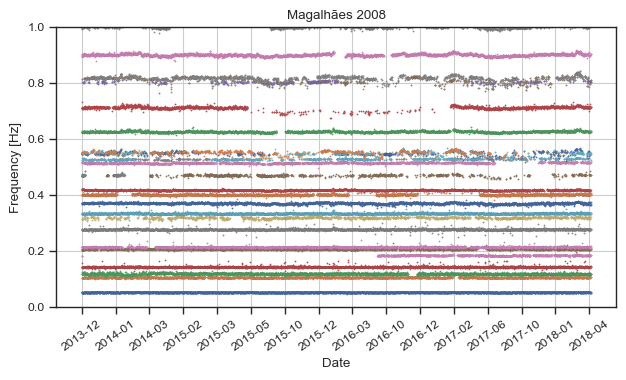

In [108]:
fig_mag=trace_comparisons_Mag.plot_all_traces(fname='Magalhaes2008_rerun.png',title='Magalhães 2008')

In [41]:
fig_mag=trace_comparisons_Mag.plot_all_traces_2(fname='Magalhaes2008_2_ec_rerun.png',title='Magalhães 2008',initial='suggested',init_freqs=freqs3)

range(0, 3853, 256)


# Cabboi

In [ ]:
trace_comparisons_cab=PostTraceComparison()
trace_comparisons_cab.import_Post_traces_from_folder('../../../Tracking/Cabboi_df01_dm01_2/')
comp_traces.append(trace_comparisons_cab)

range(0, 3852, 256)


c:\Users\olebj\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\olebj\miniconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


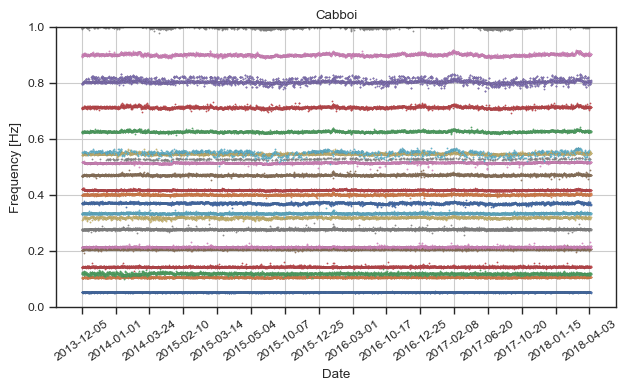

In [15]:
fig_mag=trace_comparisons_cab.plot_all_traces(fname='Cabboi.png',title='Cabboi')

range(0, 3852, 256)


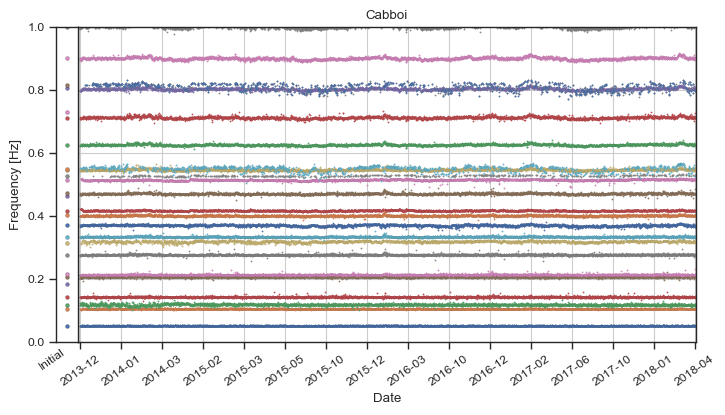

In [ ]:
fig_mag=trace_comparisons_cab.plot_all_traces_2(fname='Cabboi_2_ec_d_rerun.png',title='Cabboi',initial='suggested',init_freqs=freqs3)

0.4644135498560463
590


C:\Users\olebj\AppData\Local\Temp\ipykernel_6716\2569439084.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[0].set_xticklabels([2,4,6,8,10,12])


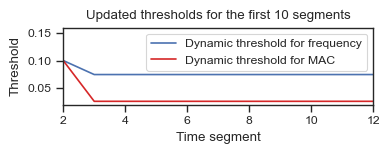

In [85]:
for i in range(13,14):
    fig=plt.figure(figsize=(4,1))
    brun_f=(trace_comparisons_cab.Post_traces[i].trace.df_threshold_list)
    brun_mac=(trace_comparisons_cab.Post_traces[i].trace.dmac_threshold_list)
    print((trace_comparisons_cab.Post_traces[i].trace.ref_frequency))
    print((trace_comparisons_cab.Post_traces[i].trace.time_seg[0]))
    
    # lilla_f=(trace_comparisons_cab.Post_traces[-4].trace.df_threshold_list)
    # lilla_mac=(trace_comparisons_cab.Post_traces[-4].trace.dmac_threshold_list)

    plt.plot(brun_f,label='Dynamic threshold for frequency')
    plt.plot(brun_mac,label='Dynamic threshold for MAC',color='tab:red')
    plt.title('Updated thresholds for the first 10 segments')
    plt.xlabel('Time segment')
    plt.ylabel('Threshold')
    plt.ylim(0.02,0.16)
    # plt.plot(lilla_f,label='lilla_f')
    # plt.plot(lilla_mac,label='lilla_mac')
    plt.legend(loc='upper right')
    plt.xlim(0,10)
    fig.axes[0].set_xticklabels([2,4,6,8,10,12])
    plt.savefig(fname='cabboi_fucked_thresholds_2.png',dpi=400,bbox_inches='tight')
    
    plt.show()

0.05172643750650809


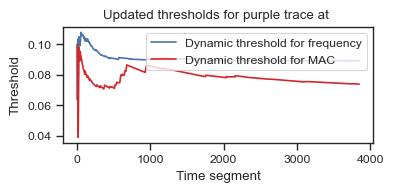

0.10410831830805774


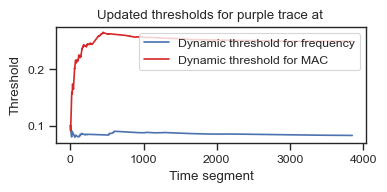

0.11615227855492505


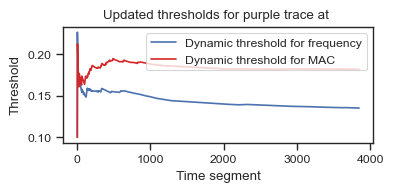

0.1433049853459329


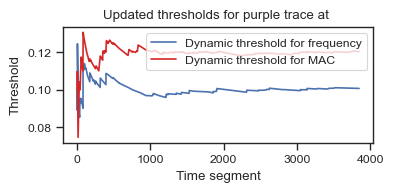

0.20668422446178325


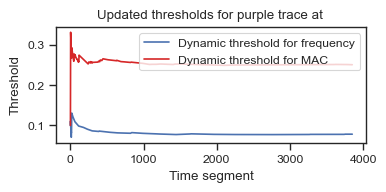

0.21430456494372344


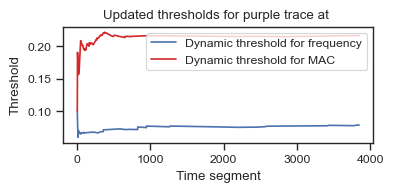

0.2762049671515912


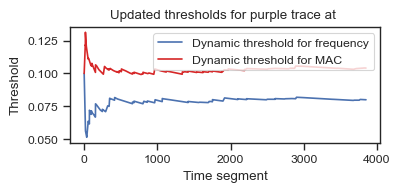

0.314069188441939


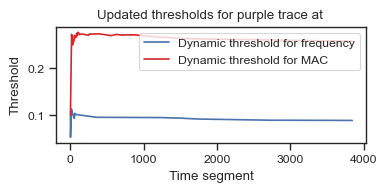

0.33343289812526117


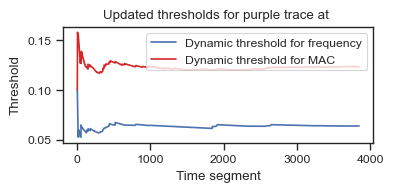

0.36958365124424725


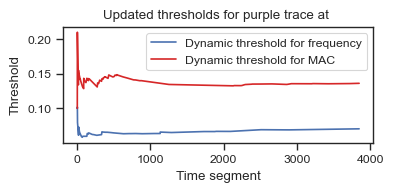

0.4013171886398324


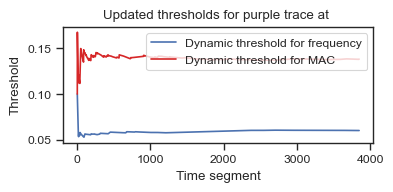

0.4168718644147503


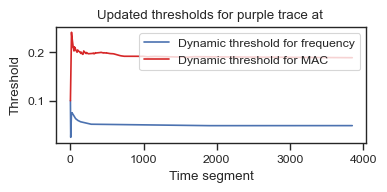

0.4644135498560463


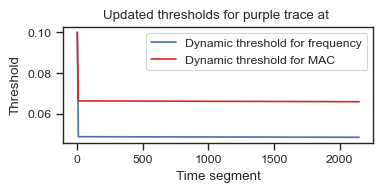

0.4644135498560463


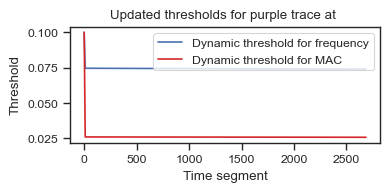

0.4735604603497644


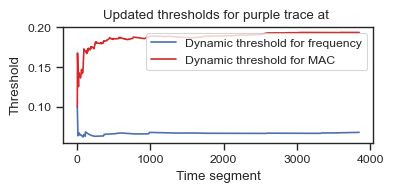

0.5145586465965003


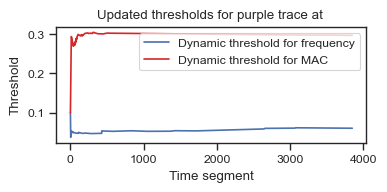

0.5259681243863279


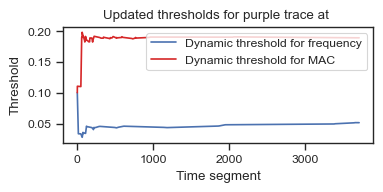

0.546963578133058


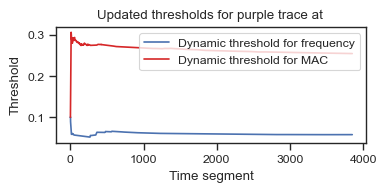

0.5480930392286258


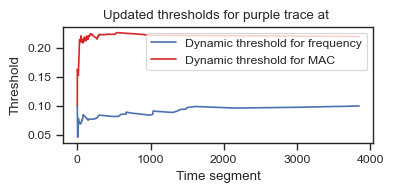

0.6241929164035026


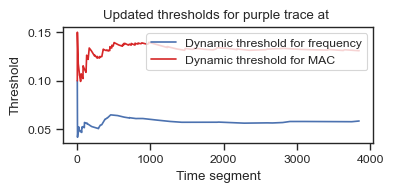

0.7115255886767143


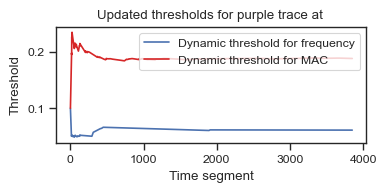

0.8043295118432469


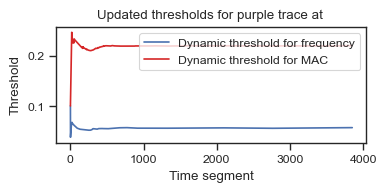

0.814318517543987


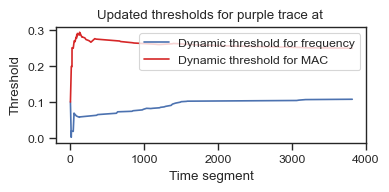

0.814318517543987


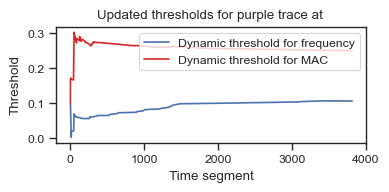

0.9019662524428758


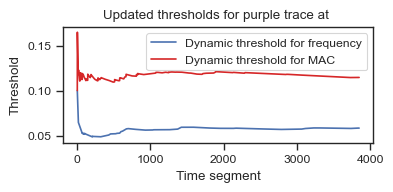

0.9994446923597933


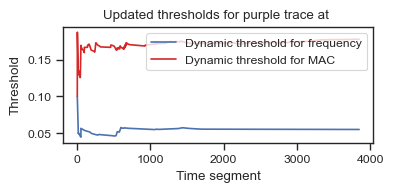

0.7305720662011584


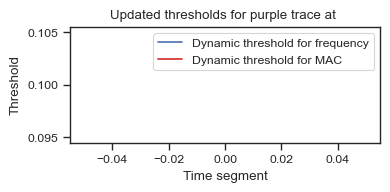

In [86]:
for i in range(27):
    plt.figure(figsize=(4,1.5))
    brun_f=(trace_comparisons_cab.Post_traces[i].trace.df_threshold_list)
    brun_mac=(trace_comparisons_cab.Post_traces[i].trace.dmac_threshold_list)
    print((trace_comparisons_cab.Post_traces[i].trace.ref_frequency))
    lilla_f=(trace_comparisons_cab.Post_traces[-4].trace.df_threshold_list)
    lilla_mac=(trace_comparisons_cab.Post_traces[-4].trace.dmac_threshold_list)

    plt.plot(brun_f,label='Dynamic threshold for frequency')
    plt.plot(brun_mac,label='Dynamic threshold for MAC',color='tab:red')
    plt.title('Updated thresholds for purple trace at ')
    plt.xlabel('Time segment')
    plt.ylabel('Threshold')
    # plt.ylim(0.073,0.076)
    # plt.plot(lilla_f,label='lilla_f')
    # plt.plot(lilla_mac,label='lilla_mac')
    plt.legend(loc='upper right')
    # plt.savefig(fname='cabboi_fucked_thresholds_2.png',dpi=400)
    # plt.xlim(0,10)
    plt.show()
    plt.close()

# FAvarelli

In [ ]:
trace_comparisons_fav=PostTraceComparison()
trace_comparisons_fav.import_Post_traces_from_folder('../../Tracking/Favarelli/')

trace_comparisons_fav_2=PostTraceComparison()
trace_comparisons_fav_2.import_Post_traces_from_folder('../../Tracking/Favarelli_3/')
comp_traces.append(trace_comparisons_fav_2)

range(0, 3653, 243)


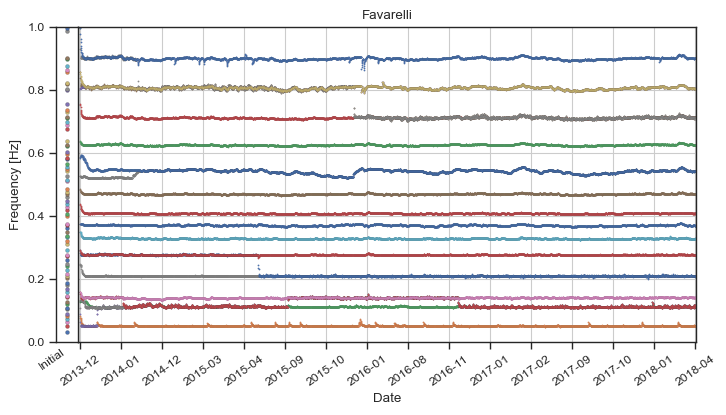

In [ ]:
init_freqs_favarelli=[0.030723842538767036 ,0.05135716556273336 ,0.06256218724237661 ,0.07095015389579831 ,0.08165746022254668 ,0.08910455918097103 ,0.10372434252644439 ,0.10846836436373566 ,0.11894136552003591 ,0.12716384912288548 ,0.14208593757095195 ,0.1461862864033917 ,0.15854573953962886 ,0.16926659352029183 ,0.1819889459200077 ,0.1856799584135502 ,0.2027118474743857 ,0.2095339271822188 ,0.21630192967591638 ,0.2296337051949282 ,0.24105298565416533 ,0.2461951006833303 ,0.25991186545706146 ,0.27255855735914297 ,0.2763569269558858 ,0.29008573041450264 ,0.3118536710366643 ,0.31891911911064985 ,0.3325377207852737 ,0.33510225831366536 ,0.3500967398762237 ,0.36012209637005244 ,0.3707388826270319 ,0.37504494109439196 ,0.4003211888160241 ,0.4058970650762509 ,0.41697273690508185 ,0.4282025933313906 ,0.43819122493649065 ,0.44723901303240343 ,0.4587086251629338 ,0.46959247845152025 ,0.47432078523803173 ,0.485399145373394 ,0.5120870372778983 ,0.5142583725117041 ,0.5262557640759221 ,0.5409644583250022 ,0.5472939831836501 ,0.5550139165317994 ,0.5658498892342538 ,0.5814431611118925 ,0.5845780478009248 ,0.5968267452574543 ,0.6040687416269239 ,0.6212399708901143 ,0.6255067141012259 ,0.6363572853220951 ,0.6765668253060534 ,0.688176632096252 ,0.6983207742542417 ,0.7096071947139853 ,0.7137258972715257 ,0.7287449857430156 ,0.7349426462645279 ,0.7565008830971015 ,0.7997514398574279 ,0.8039566680296364 ,0.8171117251546133 ,0.8228317776393606 ,0.8577404111100054 ,0.8637021770750485 ,0.8767267872498967 ,0.8989524921453502 ,0.9026034896729748 ,0.9863755991331093 ,0.9975347407693836]
to_plot_freqs=[]
for freq in init_freqs_favarelli:
    to_plot_freqs.append([freq])
    
fig_fav_2=trace_comparisons_fav_2.plot_all_traces_2(fname='Favarelli_31_init.png',title='Favarelli',init_freqs=to_plot_freqs,initial='suggested')


### DO NOT RUN AGAIN. colors will be fucked

range(0, 3653, 243)


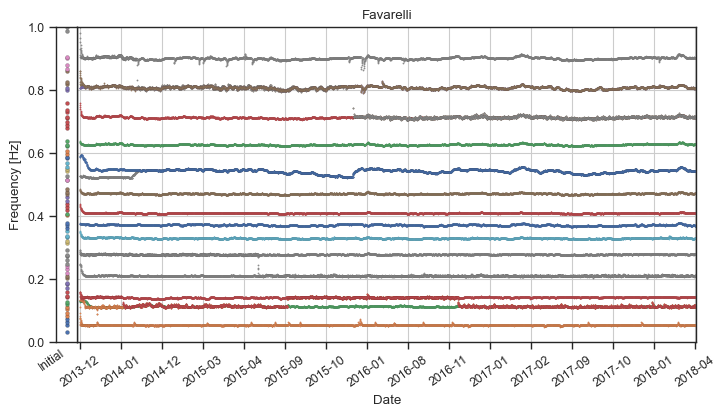

In [25]:
fig_fav_2=trace_comparisons_fav_2.plot_all_traces_2(fname='Favarelli_31_init.png',title='Favarelli',init_freqs=to_plot_freqs,initial='suggested')

### Raw covssi:

In [34]:
folder_path='../../../5hz_resampled_int_trans_clustered_3/'
omegas,phis,names=import_folder_for_tracking(folder_path)
freqs=radtoHz(omegas)
print((freqs[0]))


[0.05172644 0.10410832 0.11615228 0.14330499 0.18327255 0.20668422
 0.21430456 0.27620497 0.31406919 0.3334329  0.36958365 0.40131719
 0.41687186 0.46441355 0.47356046 0.51455865 0.52596812 0.54696358
 0.54809304 0.62419292 0.71152559 0.73057207 0.80432951 0.81431852
 0.90196625 0.99944469]


range(0, 3853, 365)


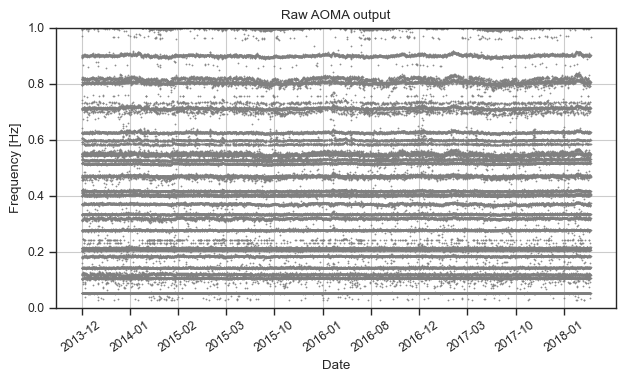

In [36]:
fig=trace_comparisons_fav.plot_all_traces(interactive=False,n=10,raw=True,raw_freqs=freqs,raw_names=names,fname='Raw_AOMA_otput_2.png',title='Raw AOMA output')

# Crossing comparison


range(0, 3853, 256)
range(0, 3853, 256)
range(0, 3852, 256)
range(0, 3653, 243)
range(0, 3803, 253)


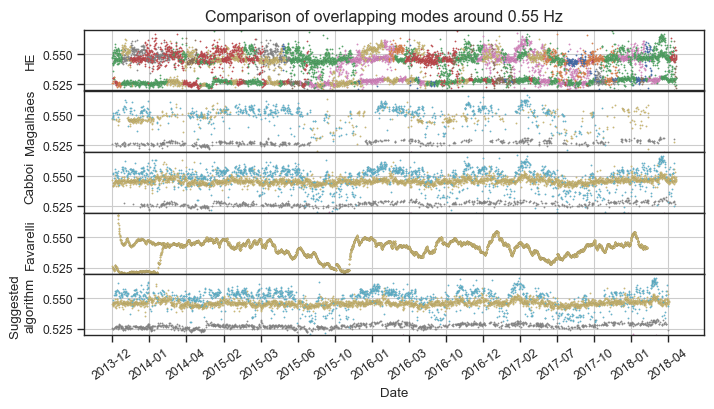

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [ ]:
order=np.array([1,2,3,4,0])
cross_fig,axs=plt.subplots(5,1,figsize=(8,3.5),sharex='col')
titles=['Suggested \nalgorithm','HE','Magalhães','Cabboi','Favarelli']
for i,ax in enumerate(axs): 
    ix=order[i]
    ax=comp_traces[ix].plot_all_traces(ax=ax)
    ax.set_ylabel(titles[ix])
    ax.set_ylim(0.52,0.57)
    # ax.set_ylabel('')
cross_fig.subplots_adjust(hspace=0.01,top=0.92,bottom=0.05)
cross_fig.suptitle('Comparison of overlapping modes around 0.55 Hz')
cross_fig.savefig(fname='055_comparison_plot_rerun2.png',dpi=400,bbox_inches='tight')
plt.show()


### visulize

In [25]:
for i in range(3):
    trace_comparisons_alg1.gen_single_mode_plot(i)
#17 18


: 

In [ ]:
mode_trace1=trace_comparisons_alg1.Post_traces[16]
mode_trace2=trace_comparisons_alg1.Post_traces[17]
